In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [2]:
max_features = 10000

(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=max_features)

In [3]:
maxlen = 500
train_x = sequence.pad_sequences(train_x, maxlen=maxlen)
test_x = sequence.pad_sequences(test_x, maxlen=maxlen)

In [4]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
______________________________________________

In [6]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc'])

In [7]:
history = model.fit(train_x, train_y, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 55s 342ms/step - loss: 4.3676 - acc: 0.4983 - val_loss: 0.6914 - val_acc: 0.5214
Epoch 2/10
157/157 [==============================] - 62s 394ms/step - loss: 0.6822 - acc: 0.5950 - val_loss: 0.6744 - val_acc: 0.6318
Epoch 3/10
157/157 [==============================] - 60s 384ms/step - loss: 0.6487 - acc: 0.7449 - val_loss: 0.6410 - val_acc: 0.6904
Epoch 4/10
157/157 [==============================] - 64s 407ms/step - loss: 0.5923 - acc: 0.8032 - val_loss: 0.5518 - val_acc: 0.7864
Epoch 5/10
157/157 [==============================] - 63s 400ms/step - loss: 0.4812 - acc: 0.8370 - val_loss: 0.4318 - val_acc: 0.8314
Epoch 6/10
157/157 [==============================] - 56s 357ms/step - loss: 0.3685 - acc: 0.8656 - val_loss: 0.4014 - val_acc: 0.8482
Epoch 7/10
157/157 [==============================] - 54s 342ms/step - loss: 0.3115 - acc: 0.8894 - val_loss: 0.4269 - val_acc: 0.8468
Epoch 8/10
157/157 [==============================] - 6

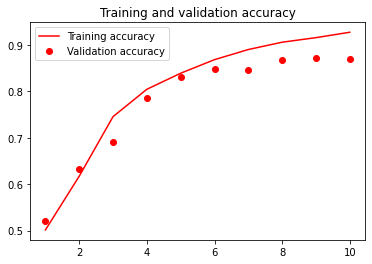

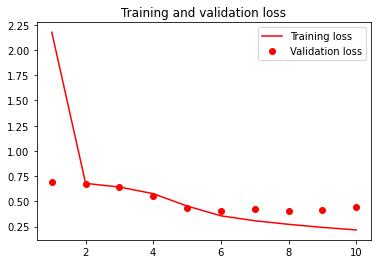

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 1+len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()